In [1]:
%load_ext autoreload
%load_ext lab_black
%autoreload 2

import os
import sys

sys.path.append(os.getenv("GLOBAL_LIBRARIES_PATH", ""))
sys.path = list(set(sys.path))

In [2]:
import numpy as np

from pathlib import Path
from PIL import Image, ImageDraw
from IPython.display import display

from helpers.shapes import Point, Shape, Segment

pmt_storage = Path(os.getenv("PMT_STG_PATH"))

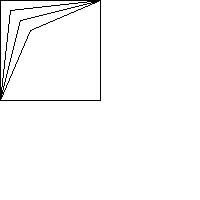

In [3]:
white_col = (255, 255, 255)
im = Image.new("RGB", (200, 200), white_col)

shape_list = []

shape_list.append(
    Shape(points=[Point(0, 0), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(10, 10), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(20, 20), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(30, 30), Point(0, 100), Point(100, 100), Point(100, 0)])
)

for sss in shape_list:
    sss.draw(im)

im

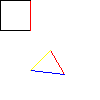

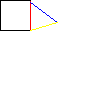

In [20]:
im = Shape.create_empty_img()

s1 = Shape(
    [Point(0, 0), Point(0, 30), Point(30, 30), Point(30, 0)], color_dict={2: "red"}
)
s1.draw(im)

s2 = Shape(
    [Point(50, 50), Point(64, 74), Point(30, 70)],
    color_dict={0: "red"},
)
s2.draw(im)

display(im)

im = Shape.create_empty_img()

g1 = s1.segments[2]
g2 = s2.segments[0]
# print(g1, g2, g1.length, g2.length)

s1.combine(s2, (2, 0), (0, 0))

# s1.rotate(Point(15, 15), 360)
s1.draw(im)

# s2.draw(im)
# s2.rotate(g1.p0, 30)
s2.draw(im)

display(im)